Data Prep


'#converting multiclass labels present in our datasets to binary class labels\nfor i , row in data_TrainNews.iterrows():\n    if (data_TrainNews.iloc[:,0] == "mostly-true" | data_TrainNews.iloc[:,0] == "half-true" | data_TrainNews.iloc[:,0] == "true"):\n        data_TrainNews.iloc[:,0] = "true"\n    else :\n        data_TrainNews.iloc[:,0] = "false"\n        \nfor i,row in data_TrainNews.iterrows():\n    print(row)\n'

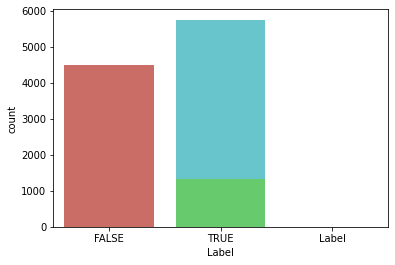

In [0]:

#import os
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb

#before reading the files, setup the working directory to point to project repo
#reading data files 


test_filename = 'test.csv'
train_filename = 'train.csv'
valid_filename = 'valid.csv'

train_news = pd.read_csv(train_filename)
test_news = pd.read_csv(test_filename)
valid_news = pd.read_csv(valid_filename)



#data observation
def data_obs():
    print("training dataset size:")
    print(train_news.shape)
    print(train_news.head(10))

    #below dataset were used for testing and validation purposes
    print(test_news.shape)
    print(test_news.head(10))
    
    print(valid_news.shape)
    print(valid_news.head(10))

#check the data by calling below function
#data_obs()

#distribution of classes for prediction
def create_distribution(dataFile):
    
    return sb.countplot(x='Label', data=dataFile, palette='hls')
    

#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_news)
create_distribution(test_news)
create_distribution(valid_news)


#data integrity check (missing label values)
#none of the datasets contains missing values therefore no cleaning required
def data_qualityCheck():
    
    print("Checking data qualitites...")
    train_news.isnull().sum()
    train_news.info()
        
    print("check finished.")

    #below datasets were used to 
    test_news.isnull().sum()
    test_news.info()

    valid_news.isnull().sum()
    valid_news.info()

#run the below function call to see the quality check results
#data_qualityCheck()



#eng_stemmer = SnowballStemmer('english')
#stopwords = set(nltk.corpus.stopwords.words('english'))

#Stemming
def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

#process the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed


#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

#bigram
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

"""
#trigrams
def create_trigrams(words):
    assert type(words) == list
    skip == 0
    join_str = " "
    Len = len(words)
    if L > 2:
        lst = []
        for i in range(1,skip+2):
            for k1 in range(1, skip+2):
                for k2 in range(1,skip+2):
                    for i+k1 < Len and i+k1+k2 < Len:
                        lst.append(join_str.join([words[i], words[i+k1],words[i+k1+k2])])
        else:
            #set is as bigram
            lst = create_bigram(words)
    return lst
"""


porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

#doc = ['runners like running and thus they run','this is a test for tokens']
#tokenizer([word for line in test_news.iloc[:,1] for word in line.lower().split()])

#show the distribution of labels in the train and test data
"""def create_datafile(filename)
    #function to slice the dataframe to keep variables necessary to be used for classification
    return "return df to be used"
"""
    
"""#converting multiclass labels present in our datasets to binary class labels
for i , row in data_TrainNews.iterrows():
    if (data_TrainNews.iloc[:,0] == "mostly-true" | data_TrainNews.iloc[:,0] == "half-true" | data_TrainNews.iloc[:,0] == "true"):
        data_TrainNews.iloc[:,0] = "true"
    else :
        data_TrainNews.iloc[:,0] = "false"
        
for i,row in data_TrainNews.iterrows():
    print(row)
"""
    


Feature Selection

In [0]:
"""
Note: before we can train an algorithm to classify fake news labels, we need to extract features from it. It means reducing the mass
of unstructured data into some uniform set of attributes that an algorithm can understand. For fake news detection, it could be 
word counts (bag of words). 
"""
import DataPrep
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
nltk.download('treebank')
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec


#we will start with simple bag of words technique 
#creating feature vector - document term matrix
countV = CountVectorizer()
train_count = countV.fit_transform(DataPrep.train_news['Statement'].values)

print(countV)
print(train_count)

#print training doc term matrix
#we have matrix of size of (10240, 12196) by calling below
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])


#create tf-df frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])


#bag of words - with n-grams
#countV_ngram = CountVectorizer(ngram_range=(1,3),stop_words='english')
#tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)

tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)


#POS Tagging
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = DataPrep.train_news['Statement']
 
print(training_sentences)

#training POS tagger based on words
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }
    
    
#helper function to strip tags from tagged corpus	
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]



#Using Word2Vec 
##with open("glove.6B.50d.txt", "rb") as lines:
##    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
##           for line in lines}



#model = gensim.models.Word2Vec(X, size=100) # x be tokenized text
#w2v = dict(zip(model.wv.index2word, model.wv.syn0))


class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


"""
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

"""


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 78

"\nclass TfidfEmbeddingVectorizer(object):\n    def __init__(self, word2vec):\n        self.word2vec = word2vec\n        self.word2weight = None\n        self.dim = len(word2vec.itervalues().next())\n\n    def fit(self, X, y):\n        tfidf = TfidfVectorizer(analyzer=lambda x: x)\n        tfidf.fit(X)\n        # if a word was never seen - it must be at least as infrequent\n        # as any of the known words - so the default idf is the max of \n        # known idf's\n        max_idf = max(tfidf.idf_)\n        self.word2weight = defaultdict(\n            lambda: max_idf,\n            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])\n\n        return self\n\n    def transform(self, X):\n        return np.array([\n                np.mean([self.word2vec[w] * self.word2weight[w]\n                         for w in words if w in self.word2vec] or\n                        [np.zeros(self.dim)], axis=0)\n                for words in X\n            ])\n\n"

Classifier

In [0]:
import DataPrep
import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.metrics import classification_report



#string to test
doc_new = ['obama is running for president in 2016']

#the feature selection has been done in FeatureSelection.py module. here we will create models using those features for prediction

#first we will use bag of words techniques

#building classifier using naive bayes 
nb_pipeline = Pipeline([
        ('NBCV',FeatureSelection.countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_nb = nb_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_nb == DataPrep.test_news['Label'])


#building classifier using logistic regression
logR_pipeline = Pipeline([
        ('LogRCV',FeatureSelection.countV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR = logR_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR == DataPrep.test_news['Label'])


#building Linear SVM classfier
svm_pipeline = Pipeline([
        ('svmCV',FeatureSelection.countV),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_svm = svm_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_svm == DataPrep.test_news['Label'])


#using SVM Stochastic Gradient Descent on hinge loss
sgd_pipeline = Pipeline([
        ('svm2CV',FeatureSelection.countV),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

sgd_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_sgd = sgd_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_sgd == DataPrep.test_news['Label'])


#random forest
random_forest = Pipeline([
        ('rfCV',FeatureSelection.countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf = random_forest.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf == DataPrep.test_news['Label'])


#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(DataPrep.train_news):
        train_text = DataPrep.train_news.iloc[train_ind]['Statement'] 
        train_y = DataPrep.train_news.iloc[train_ind]['Label']
    
        test_text = DataPrep.train_news.iloc[test_ind]['Statement']
        test_y = DataPrep.train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(DataPrep.train_news)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))
    
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline)
build_confusion_matrix(logR_pipeline)
build_confusion_matrix(svm_pipeline)
build_confusion_matrix(sgd_pipeline)
build_confusion_matrix(random_forest)

#========================================================================================
#Bag of words confusion matrix and F1 scores

#Naive bayes
# [2118 2370]
# [1664 4088]
# f1-Score: 0.669611539651

#Logistic regression
# [2252 2236]
# [1933 3819]
# f1-Score: 0.646909097798

#svm
# [2260 2228]
# [2246 3506]
#f1-score: 0.610468748792

#sgdclassifier
# [2414 2074]
# [2042 3710]
# f1-Score: 0.640874558778

#random forest classifier
# [1821 2667]
# [1192 4560]
# f1-Score: 0.702651511011
#=========================================================================================


"""So far we have used bag of words technique to extract the features and passed those featuers into classifiers. We have also seen the
f1 scores of these classifiers. now lets enhance these features using term frequency weights with various n-grams
"""

##Now using n-grams
#naive-bayes classifier
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',FeatureSelection.tfidf_ngram),
        ('nb_clf',MultinomialNB())])

nb_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_nb_ngram == DataPrep.test_news['Label'])


#logistic regression classifier
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',FeatureSelection.tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR_ngram == DataPrep.test_news['Label'])


#linear SVM classifier
svm_pipeline_ngram = Pipeline([
        ('svm_tfidf',FeatureSelection.tfidf_ngram),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_svm_ngram = svm_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_svm_ngram == DataPrep.test_news['Label'])


#sgd classifier
sgd_pipeline_ngram = Pipeline([
         ('sgd_tfidf',FeatureSelection.tfidf_ngram),
         ('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
         ])

sgd_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_sgd_ngram == DataPrep.test_news['Label'])


#random forest classifier
random_forest_ngram = Pipeline([
        ('rf_tfidf',FeatureSelection.tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3))
        ])
    
random_forest_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf_ngram = random_forest_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf_ngram == DataPrep.test_news['Label'])


#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline_ngram)
build_confusion_matrix(logR_pipeline_ngram)
build_confusion_matrix(svm_pipeline_ngram)
build_confusion_matrix(sgd_pipeline_ngram)
build_confusion_matrix(random_forest_ngram)

#========================================================================================
#n-grams & tfidf confusion matrix and F1 scores

#Naive bayes
# [841 3647]
# [427 5325]
# f1-Score: 0.723262051071

#Logistic regression
# [1617 2871]
# [1097 4655]
# f1-Score: 0.70113000531

#svm
# [2016 2472]
# [1524 4228]
# f1-Score: 0.67909201429

#sgdclassifier
# [  10 4478]
# [  13 5739]
# f1-Score: 0.718731637053

#random forest
# [1979 2509]
# [1630 4122]
# f1-Score: 0.665720333284
#=========================================================================================

print(classification_report(DataPrep.test_news['Label'], predicted_nb_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_LogR_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_svm_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_sgd_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_rf_ngram))

DataPrep.test_news['Label'].shape

"""
Out of all the models fitted, we would take 2 best performing model. we would call them candidate models
from the confusion matrix, we can see that random forest and logistic regression are best performing 
in terms of precision and recall (take a look into false positive and true negative counts which appeares
to be low compared to rest of the models)
"""

#grid-search parameter optimization
#random forest classifier parameters
parameters = {'rf_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'rf_tfidf__use_idf': (True, False),
               'rf_clf__max_depth': (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)
}

gs_clf = GridSearchCV(random_forest_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(DataPrep.train_news['Statement'][:10000],DataPrep.train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

#logistic regression parameters
parameters = {'LogR_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'LogR_tfidf__use_idf': (True, False),
               'LogR_tfidf__smooth_idf': (True, False)
}

gs_clf = GridSearchCV(logR_pipeline_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(DataPrep.train_news['Statement'][:10000],DataPrep.train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

#Linear SVM 
parameters = {'svm_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'svm_tfidf__use_idf': (True, False),
               'svm_tfidf__smooth_idf': (True, False),
               'svm_clf__penalty': ('l1','l2'),
}

gs_clf = GridSearchCV(svm_pipeline_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(DataPrep.train_news['Statement'][:10000],DataPrep.train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

#by running above commands we can find the model with best performing parameters


#running both random forest and logistic regression models again with best parameter found with GridSearch method
random_forest_final = Pipeline([
        ('rf_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,3),use_idf=True,smooth_idf=True)),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3,max_depth=10))
        ])
    
random_forest_final.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf_final = random_forest_final.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf_final == DataPrep.test_news['Label'])
print(classification_report(DataPrep.test_news['Label'], predicted_rf_final))

logR_pipeline_final = Pipeline([
        #('LogRCV',countV_ngram),
        ('LogR_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,5),use_idf=True,smooth_idf=False)),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_final.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR_final = logR_pipeline_final.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR_final == DataPrep.test_news['Label'])
#accuracy = 0.62

print(classification_report(DataPrep.test_news['Label'], predicted_LogR_final))


"""
by running both random forest and logistic regression with GridSearch's best parameter estimation, we found that for random 
forest model with n-gram has better accuracty than with the parameter estimated. The logistic regression model with best parameter 
has almost similar performance as n-gram model so logistic regression will be out choice of model for prediction.
"""

#saving best model to the disk
model_file = 'final_model.sav'
pickle.dump(logR_pipeline_ngram,open(model_file,'wb'))


#Plotting learing curve
def plot_learing_curve(pipeline,title):
    size = 10000
    cv = KFold(size, shuffle=True)
    
    X = DataPrep.train_news["Statement"]
    y = DataPrep.train_news["Label"]
    
    pl = pipeline
    pl.fit(X,y)
    
    train_sizes, train_scores, test_scores = learning_curve(pl, X, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
       
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
     
    plt.figure()
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()


#below command will plot learing curves for each of the classifiers
plot_learing_curve(logR_pipeline_ngram,"Naive-bayes Classifier")
plot_learing_curve(nb_pipeline_ngram,"LogisticRegression Classifier")
plot_learing_curve(svm_pipeline_ngram,"SVM Classifier")
plot_learing_curve(sgd_pipeline_ngram,"SGD Classifier")
plot_learing_curve(random_forest_ngram,"RandomForest Classifier")

"""
by plotting the learning cureve for logistic regression, it can be seen that cross-validation score is stagnating throughout and it 
is unable to learn from data. Also we see that there are high errors that indicates model is simple and we may want to increase the
model complexity.
"""


#plotting Precision-Recall curve
def plot_PR_curve(classifier):
    
    precision, recall, thresholds = precision_recall_curve(DataPrep.test_news['Label'], classifier)
    average_precision = average_precision_score(DataPrep.test_news['Label'], classifier)
    
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Random Forest Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    
plot_PR_curve(predicted_LogR_ngram)
plot_PR_curve(predicted_rf_ngram)


"""
Now let's extract the most informative feature from ifidf vectorizer for all fo the classifiers and see of there are any common
words that we can identify i.e. are these most informative feature acorss the classifiers are same? we will create a function that 
will extract top 50 features.
"""

def show_most_informative_features(model, vect, clf, text=None, n=50):
    # Extract the vectorizer and the classifier from the pipeline
    vectorizer = model.named_steps[vect]
    classifier = model.named_steps[clf]

     # Check to make sure that we can perform this computation
    if not hasattr(classifier, 'coef_'):
        raise TypeError(
            "Cannot compute most informative features on {}.".format(
                classifier.__class__.__name__
            )
        )
            
    if text is not None:
        # Compute the coefficients for the text
        tvec = model.transform([text]).toarray()
    else:
        # Otherwise simply use the coefficients
        tvec = classifier.coef_

    # Zip the feature names with the coefs and sort
    coefs = sorted(
        zip(tvec[0], vectorizer.get_feature_names()),
        reverse=True
    )
    
    # Get the top n and bottom n coef, name pairs
    topn  = zip(coefs[:n], coefs[:-(n+1):-1])

    # Create the output string to return
    output = []

    # If text, add the predicted value to the output.
    if text is not None:
        output.append("\"{}\"".format(text))
        output.append(
            "Classified as: {}".format(model.predict([text]))
        )
        output.append("")

    # Create two columns with most negative and most positive features.
    for (cp, fnp), (cn, fnn) in topn:
        output.append(
            "{:0.4f}{: >15}    {:0.4f}{: >15}".format(
                cp, fnp, cn, fnn
            )
        )
    #return "\n".join(output)
    print(output)

show_most_informative_features(logR_pipeline_ngram,vect='LogR_tfidf',clf='LogR_clf')
show_most_informative_features(nb_pipeline_ngram,vect='nb_tfidf',clf='nb_clf')
show_most_informative_features(svm_pipeline_ngram,vect='svm_tfidf',clf='svm_clf')
show_most_informative_features(sgd_pipeline_ngram,vect='sgd_tfidf',clf='sgd_clf')


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Total statements classified: 10240
Score: 0.66961153965076
score length 5
Confusion matrix:
[[2118 2370]
 [1664 4088]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Total statements classified: 10240
Score: 0.6466692934443682
score length 5
Confusion matrix:
[[2254 2234]
 [1936 3816]]
Total statements classified: 10240
Score: 0.6104687487924283
score length 5
Confusion matrix:
[[2260 2228]
 [2246 3506]]
Total statements classified: 10240
Score: 0.666681992859306
score length 5
Confusion matrix:
[[2135 2353]
 [1699 4053]]
Total statements classified: 10240
Score: 0.7039977134960689
score length 5
Confusion matrix:
[[1800 2688]
 [1167 4585]]
Total statements classified: 10240
Score: 0.7224053159841455
score length 5
Confusion matrix:
[[ 758 3730]
 [ 390 5362]]
Total statements classified: 10240
Score: 0.7044355553757985
score length 5
Confusion matrix:
[[1580 2908]
 [1043 4709]]
Total statements classified: 10240
Score: 0.6790920142902143
score length 5
Confusion matrix:
[[2016 2472]
 [1524 4228]]
Total statements classified: 10240
Score: 0.7190643331130575
score length 5
Confusion matrix:
[[   5 4483]
 [   6 5746]]
Total statements classified: 1024

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1169
        True       0.54      1.00      0.70      1382

    accuracy                           0.54      2551
   macro avg       0.27      0.50      0.35      2551
weighted avg       0.29      0.54      0.38      2551

              precision    recall  f1-score   support

       False       0.64      0.38      0.48      1169
        True       0.61      0.82      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551

